# Stack Overflow Survey Analysis

## Learning more about Data Scientist and Machine Learning Specialist

### Explore Data

Import necessary libraries and load datasets

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('./survey_results_public.csv')
schema = pd.read_csv('./survey_results_schema.csv')
pd.set_option('display.max_columns', None)
df.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,UnitTests,PurchaseHow,PurchaseWhat,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,"Taught yourself a new language, framework, or ...",NaN,NaN,4,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HTML/CSS;Java;JavaScript;Python,C;C++;C#;Go;HTML/CSS;Java;JavaScript;Python;SQL,SQLite,MySQL,MacOS;Windows,Android;Arduino;Windows,Django;Flask,Flask;jQuery,Node.js,Node.js,IntelliJ;Notepad++;PyCharm,Windows,I do not use containers,NaN,NaN,Yes,"Fortunately, someone else has that title",Yes,Twitter,Online,Username,2017,A few times per month or weekly,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,31-60 minutes,No,NaN,"No, I didn't know that Stack Overflow had a jo...","No, and I don't know what those are",Neutral,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,Taken an online course in programming or softw...,NaN,"Developer, desktop or enterprise applications;...",NaN,17,NaN,NaN,NaN,NaN,NaN,NaN,I am actively looking for a job,I've never had a job,NaN,NaN,Financial performance or funding status of the...,"Something else changed (education, award, medi...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C++;HTML/CSS;Python,C++;HTML/CSS;JavaScript;SQL,NaN,MySQL,Windows,Windows,Django,Django,NaN,NaN,Atom;PyCharm,Windows,I do not use containers,NaN,Useful across many domains and could change ma...,Yes,Yes,Yes,Instagram,Online,Username,2017,Daily or almost daily,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,11-30 minutes,Yes,A few times per month or weekly,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,"Taught yourself a new language, framework, or ...",100 to 499 employees,"Designer;Developer, back-end;Developer, front-...",3,22,1,Slightly satisfied,Slightly satisfied,Not at all confident,Not sure,Not sure,"I’m not actively looking, but I am open to new...",1-2 years ago,Interview with people in peer roles,No,"Languages, frameworks, and other technolo

In [2]:
df.shape

(88883, 85)

It looks like there are 88883 rows and 85 columns in the dataset

In [3]:
schema.head()

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order ...
1,MainBranch,Which of the following options best describes ...
2,Hobbyist,Do you code as a hobby?
3,OpenSourcer,How often do you contribute to open source?
4,OpenSource,How do you feel about the quality of open sour...


#### Data Exploration

In [4]:
# Function that returns description of column inputted
def get_description(column_name, schema=schema):
    '''
    INPUT - schema - pandas dataframe with the schema of the developers survey
            column_name - string - the name of the column you would like to know about
    OUTPUT - 
            desc - string - the description of the column
    '''
    desc = list(schema[schema['Column'] == column_name]['QuestionText'])[0]
    return desc

In [5]:
get_description('LanguageDesireNextYear')

'Which of the following programming, scripting, and markup languages have you done extensive development work in over the past year, and which do you want to work in over the next year?  (If you both worked with the language and want to continue to do so, please check both boxes in that row.)'

In [6]:
get_description('YearsCodePro')

'How many years have you coded professionally (as a part of your work)?'

In [7]:
# Provide a pandas series of the counts for each developer type status
dev_vals = df['DevType'].value_counts()

dev_vals

Developer, full-stack                                                                                                                                         8433
Developer, back-end                                                                                                                                           4913
Developer, back-end;Developer, front-end;Developer, full-stack                                                                                                2399
Developer, front-end                                                                                                                                          2212
Developer, mobile                                                                                                                                             2172
                                                                                                                                                              ... 
Data or business analy

Looks like one person can select more than one develop type

#### Create a df of Data Scientist only

In [8]:
# Function that splits developer type
def split_column_value(ori_df, column_name, separator=';'):
    '''
    INPUT - ori_df  - pandas dataframe -  original dataframe
            column_name - string - the name of the column you would like to splite the value
            separator - string - The is a delimiter. The string splits at this specified separator. If is not provided then ; is the separator.
    OUTPUT - 
            df - pandas dataframe - all value for the column of original dataframe
    '''
    # Drop rows with N/A values as we will not need them as we only want those that are Data Scientist/Machine Learning Specialist
    df = pd.DataFrame(ori_df[column_name].dropna().str.split(separator).tolist()).stack()
    return df

In [9]:
# Split DevType column
temp = split_column_value(df, 'DevType')
temp.head()

0  0    Developer, desktop or enterprise applications
   1                             Developer, front-end
1  0                                         Designer
   1                              Developer, back-end
   2                             Developer, front-end
dtype: object

In [10]:
temp.value_counts().sort_values(ascending = False)

Developer, full-stack                            42222
Developer, back-end                              40665
Developer, front-end                             26649
Developer, desktop or enterprise applications    17316
Developer, mobile                                14698
Student                                          11921
Database administrator                            9520
Designer                                          9182
System administrator                              8929
DevOps specialist                                 8862
Developer, embedded applications or devices       7248
Data scientist or machine learning specialist     6460
Developer, QA or test                             6359
Data or business analyst                          6294
Academic researcher                               5930
Engineer, data                                    5819
Educator                                          4492
Developer, game or graphics                       4439
Engineerin

It looks like we have 6460 data scientist or machine learning specialist in this dataset.

#### Add column to main df indicating if person is a data scientist or machine learning specialist

In [11]:
def data_dev_type(column_name):
    '''
    INPUT
        column_name - a string of one of the values from the DevType column
    
    OUTPUT
        return 1 if the keyword is in string
        return 0 otherwise
    
    '''
    if "Data scientist or machine learning specialist" in column_name:
        return 1
    else:
        return 0


#### Check for missing values

In [12]:
df['DevType'].isnull

<bound method Series.isnull of 0                                                      NaN
1        Developer, desktop or enterprise applications;...
2        Designer;Developer, back-end;Developer, front-...
3                                    Developer, full-stack
4        Academic researcher;Developer, desktop or ente...
                               ...                        
88878                                                  NaN
88879                                                  NaN
88880                                                  NaN
88881                                                  NaN
88882                                                  NaN
Name: DevType, Length: 88883, dtype: object>

In [13]:
# Use fillna mothod fill missing DevType value with 'Not metioned'
df["DevType"] = df["DevType"].fillna('Not mentioned')

In [14]:
df['DS_MLS'] = df['DevType'].apply(data_dev_type)
df_ds = df[df['DS_MLS']==1]

In [15]:
# Confirm that we have 6460 rows
df_ds.shape

(6460, 86)

## Question 1: What are the most used and desired to use programming languages?

### Languages (Current)

In [34]:
temp1 = split_column_value(df, 'LanguageWorkedWith')
temp1 = temp1.value_counts().sort_values(ascending=False)
temp1_top = temp1.head(10)

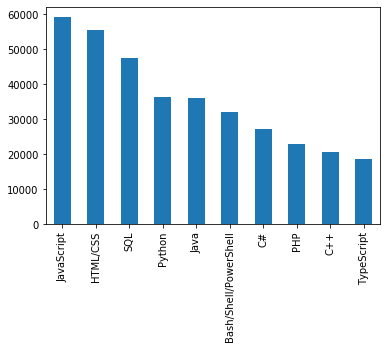

In [35]:
temp1_top.plot.bar()

### Languages (Next Year)

In [32]:
temp2 = split_column_value(df, 'LanguageDesireNextYear')
temp2 = temp2.value_counts().sort_values(ascending=False)
temp2_top = temp2.head(10)

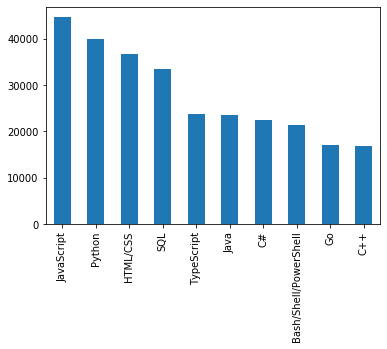

In [33]:
temp2_top.plot.bar()

## Questions 2- What are the most used and desired to use platforms?

### Platform (Current)

In [37]:
temp3 = split_column_value(df, 'PlatformWorkedWith')
temp3 = temp3.value_counts().sort_values(ascending=False)
temp3_top = temp3.head(10)

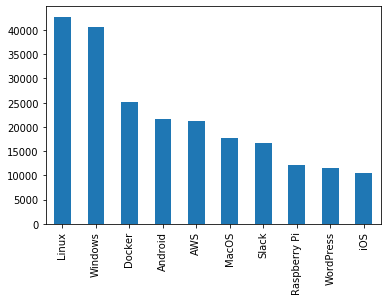

In [38]:
temp3_top.plot.bar()

### Platform (Next Year)

In [39]:
temp4 = split_column_value(df, 'PlatformDesireNextYear')
temp4 = temp4.value_counts().sort_values(ascending=False)
temp4_top = temp4.head(10)

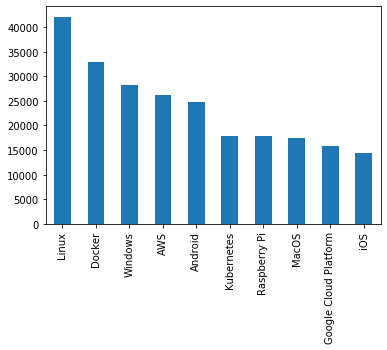

In [40]:
temp4_top.plot.bar()

## Question 3- What are the most used and desired to use web frames?

### Web Frame (Current)

In [41]:
temp5 = split_column_value(df, 'WebFrameWorkedWith')
temp5 = temp5.value_counts().sort_values(ascending=False)
temp5_top = temp5.head(10)

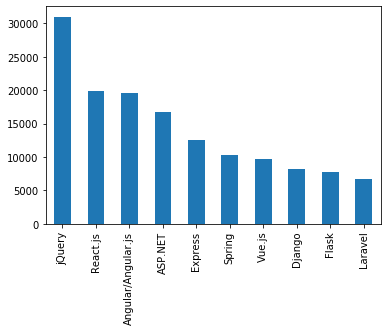

In [42]:
temp5_top.plot.bar()

### Web Frame (Next Year)

In [49]:
temp6 = split_column_value(df, 'WebFrameDesireNextYear')
temp6 = temp6.value_counts().sort_values(ascending=False)
temp6_top = temp6.head(10)

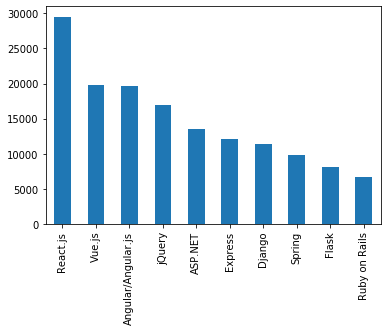

In [44]:
temp6_top.plot.bar()

## Question 4- What are the most used and desired to use databases?

### Database (Current)

In [45]:
temp7 = split_column_value(df, 'DatabaseWorkedWith')
temp7 = temp7.value_counts().sort_values(ascending=False)
temp7_top = temp7.head(10)

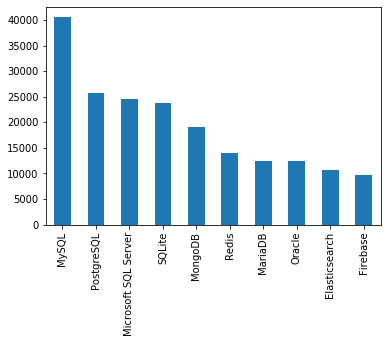

In [46]:
temp7_top.plot.bar()

### Database (Next Year)

In [47]:
temp8 = split_column_value(df, 'DatabaseDesireNextYear')
temp8 = temp8.value_counts().sort_values(ascending=False)
temp8_top = temp8.head(10)

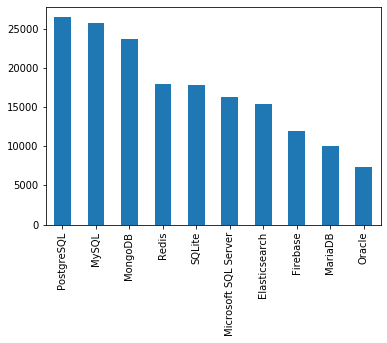

In [48]:
temp8_top.plot.bar()